In [21]:
import lda
import numpy as np

import lda.datasets
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

In [15]:
total_df = pd.read_pickle('total_df.pkl')
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26716 entries, 0 to 26715
Data columns (total 5 columns):
city       26716 non-null object
keyword    26716 non-null object
company    26716 non-null object
title      26716 non-null object
summary    26716 non-null object
dtypes: object(5)
memory usage: 1.2+ MB


In [43]:
vectorizer = CountVectorizer(stop_words={'english'},min_df=50, max_df=.6 ,ngram_range=(1,1))

cv = vectorizer.fit_transform(total_df['summary'])


In [46]:
cv.shape

(26716, 7772)

In [47]:
vocab = vectorizer.get_feature_names()

In [49]:
titles = total_df.iloc[:,0:4].apply(lambda x: '-'.join(x), axis=1)

titles

inx
0        Washington,DC-data+architect-Hill Associates-S...
1        Seattle,WA-data+architect-Wimmer Solutions-Dat...
2        Chicago,IL-data+architect-ASK Staffing-Service...
3        Chicago,IL-data+architect-Hirewell-Lead Networ...
4        Boston,MA-data+analyst-Ubuntu Autism Consultan...
5        Washington,DC-data+architect-Blackstone Techno...
6        San+Francisco,CA-data+analyst-Sunrun-Technical...
7        Chicago,IL-data+analyst-Morningstar-Manager Re...
8        New+York,NY-data+scientist-Tilting Point-Data ...
9        Seattle,WA-data+engineer-Seattle Children's Ho...
10       Chicago,IL-data+architect-Career Tech Consulti...
11       New+York,NY-data+analyst-SkyeTec-Industrial Hy...
12       Seattle,WA-data+engineer-Amazon Corporate LLC-...
13       San+Francisco,CA-data+engineer-Plum Lending-Se...
14       New+York,NY-data+scientist-Laguna Source-Senio...
15       Boston,MA-data+analyst-Gordon Brothers Compani...
16       San+Francisco,CA-data+engineer-Udacity, Inc

In [87]:
job_types = list(total_df.loc[:,'keyword'])
job_types

['data+architect',
 'data+architect',
 'data+architect',
 'data+architect',
 'data+analyst',
 'data+architect',
 'data+analyst',
 'data+analyst',
 'data+scientist',
 'data+engineer',
 'data+architect',
 'data+analyst',
 'data+engineer',
 'data+engineer',
 'data+scientist',
 'data+analyst',
 'data+engineer',
 'data+scientist',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+scientist',
 'data+engineer',
 'data+architect',
 'data+engineer',
 'data+scientist',
 'data+engineer',
 'data+engineer',
 'data+analyst',
 'data+scientist',
 'data+engineer',
 'data+architect',
 'data+engineer',
 'data+scientist',
 'data+scientist',
 'data+engineer',
 'statistician',
 'data+scientist',
 'data+engineer',
 'data+architect',
 'data+engineer',
 'data+architect',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst',
 'data+analyst

In [50]:
model = lda.LDA(n_topics=20, n_iter=50, random_state=1)
model.fit(cv)

INFO:lda:n_documents: 26716
INFO:lda:vocab_size: 7772
INFO:lda:n_words: 8885883
INFO:lda:n_topics: 20
INFO:lda:n_iter: 50
INFO:lda:<0> log likelihood: -96883874
INFO:lda:<10> log likelihood: -80279210
INFO:lda:<20> log likelihood: -74093878
INFO:lda:<30> log likelihood: -72855835
INFO:lda:<40> log likelihood: -72348376
INFO:lda:<49> log likelihood: -72049462


In [71]:
topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))
topic_word[:1]

type(topic_word): <class 'numpy.ndarray'>
shape: (20, 7772)


array([[  1.75741143e-08,   1.45882722e-04,   1.75741143e-08, ...,
          1.75741143e-08,   1.75741143e-08,   1.75741143e-08]])

In [52]:
for n in range(5):
    sum_pr = sum(topic_word[n,:])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 1.000000000000062
topic: 1 sum: 1.00000000000014
topic: 2 sum: 1.000000000000092
topic: 3 sum: 0.9999999999999856
topic: 4 sum: 1.0000000000000784


In [72]:
n = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ', '.join(topic_words)))

*Topic 0
- design, solutions, technical, management, architecture, technology, requirements, enterprise, salesforce, project
*Topic 1
- product, marketing, products, okta, management, sas, market, advertising, statistical, strategy
*Topic 2
- software, web, design, java, code, new, engineer, engineering, applications, test
*Topic 3
- support, requirements, systems, system, test, quality, technical, testing, analysis, management
*Topic 4
- marketing, analytics, analysis, teams, strong, analytical, insights, across, role, key
*Topic 5
- sales, customer, product, technical, customers, solutions, management, products, new, market
*Topic 6
- you, your, re, company, about, what, it, people, us, by
*Topic 7
- security, network, cisco, it, networking, cloud, services, systems, technologies, infrastructure
*Topic 8
- medical, care, health, center, clinical, patient, medicine, all, healthcare, hospital
*Topic 9
- analysis, analytics, research, statistical, risk, modeling, clients, models, quanti

In [54]:
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))

type(doc_topic): <class 'numpy.ndarray'>
shape: (26716, 20)


In [73]:
import joblib

joblib.dump(doc_topic,'lda_model.pkl')


['lda_model.pkl', 'lda_model.pkl_01.npy']

In [55]:
for n in range(5):
    sum_pr = sum(doc_topic[n,:])
    print("document: {} sum: {}".format(n, sum_pr))

document: 0 sum: 0.9999999999999999
document: 1 sum: 0.9999999999999998
document: 2 sum: 1.0000000000000004
document: 3 sum: 1.0000000000000002
document: 4 sum: 1.0


In [56]:
doc_topic[2000,:]

array([  2.73972603e-04,   2.73972603e-04,   5.75342466e-03,
         3.01369863e-03,   1.01643836e-01,   2.73972603e-04,
         2.73972603e-04,   2.73972603e-04,   2.73972603e-04,
         3.01369863e-03,   1.75616438e-01,   2.73972603e-04,
         3.04383562e-01,   8.24657534e-02,   1.42739726e-01,
         2.73972603e-04,   2.73972603e-04,   4.13698630e-02,
         3.01369863e-03,   1.34520548e-01])

In [57]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:80]))

doc: 0 topic: 7
Washington,DC-data+architect-Hill Associates-Senior Telecommunications Network E...
doc: 1 topic: 14
Seattle,WA-data+architect-Wimmer Solutions-Data Architect - 18709...
doc: 2 topic: 0
Chicago,IL-data+architect-ASK Staffing-Service Now Technology Architect...
doc: 3 topic: 7
Chicago,IL-data+architect-Hirewell-Lead Network Architect...
doc: 4 topic: 19
Boston,MA-data+analyst-Ubuntu Autism Consultants-Registered Behavior Technician...
doc: 5 topic: 0
Washington,DC-data+architect-Blackstone Technology Group-Software Delivery Engin...
doc: 6 topic: 5
San+Francisco,CA-data+analyst-Sunrun-Technical Pricing Analyst...
doc: 7 topic: 9
Chicago,IL-data+analyst-Morningstar-Manager Research Analyst...
doc: 8 topic: 14
New+York,NY-data+scientist-Tilting Point-Data Scientist...
doc: 9 topic: 14
Seattle,WA-data+engineer-Seattle Children's Hospital-Data Engineer, Sr...


In [58]:
model10 = lda.LDA(n_topics=10, n_iter=50, random_state=1)
model10.fit(cv)

INFO:lda:n_documents: 26716
INFO:lda:vocab_size: 7772
INFO:lda:n_words: 8885883
INFO:lda:n_topics: 10
INFO:lda:n_iter: 50
INFO:lda:<0> log likelihood: -89705982
INFO:lda:<10> log likelihood: -79380915
INFO:lda:<20> log likelihood: -73327945
INFO:lda:<30> log likelihood: -72411844
INFO:lda:<40> log likelihood: -72057763
INFO:lda:<49> log likelihood: -71866387


In [59]:
topic_word10 = model10.topic_word_
print("type(topic_word10): {}".format(type(topic_word10)))
print("shape: {}".format(topic_word10.shape))

type(topic_word10): <class 'numpy.ndarray'>
shape: (10, 7772)


In [61]:
doc_topic10 = model10.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))

type(doc_topic): <class 'numpy.ndarray'>
shape: (26716, 20)


In [62]:
n = 8
for i, topic_dist10 in enumerate(topic_word10):
    topic_words10 = np.array(vocab)[np.argsort(topic_dist10)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ', '.join(topic_words10)))

*Topic 0
- marketing, product, analytics, sales, teams, customer, management, strong
*Topic 1
- security, technical, solutions, design, requirements, technology, management, systems
*Topic 2
- you, your, company, re, about, new, from, what
*Topic 3
- software, systems, engineering, design, technologies, technical, cloud, engineer
*Topic 4
- research, energy, required, health, analysis, staff, care, clinical
*Topic 5
- you, research, medical, health, information, all, care, position
*Topic 6
- management, sales, support, customer, financial, services, all, solutions
*Topic 7
- you, science, learning, analytics, analysis, amazon, machine, large
*Topic 8
- project, management, support, required, analysis, all, reports, clinical
*Topic 9
- climate, you, farmers, digital, design, products, web, provide


In [63]:
for n in range(10):
    topic_most_pr = doc_topic10[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:80]))

doc: 0 topic: 3
Washington,DC-data+architect-Hill Associates-Senior Telecommunications Network E...
doc: 1 topic: 3
Seattle,WA-data+architect-Wimmer Solutions-Data Architect - 18709...
doc: 2 topic: 1
Chicago,IL-data+architect-ASK Staffing-Service Now Technology Architect...
doc: 3 topic: 3
Chicago,IL-data+architect-Hirewell-Lead Network Architect...
doc: 4 topic: 5
Boston,MA-data+analyst-Ubuntu Autism Consultants-Registered Behavior Technician...
doc: 5 topic: 1
Washington,DC-data+architect-Blackstone Technology Group-Software Delivery Engin...
doc: 6 topic: 0
San+Francisco,CA-data+analyst-Sunrun-Technical Pricing Analyst...
doc: 7 topic: 6
Chicago,IL-data+analyst-Morningstar-Manager Research Analyst...
doc: 8 topic: 2
New+York,NY-data+scientist-Tilting Point-Data Scientist...
doc: 9 topic: 7
Seattle,WA-data+engineer-Seattle Children's Hospital-Data Engineer, Sr...


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
# use matplotlib style sheet
try:
    plt.style.use('ggplot')
except:
    # version of matplotlib might not be recent
    pass

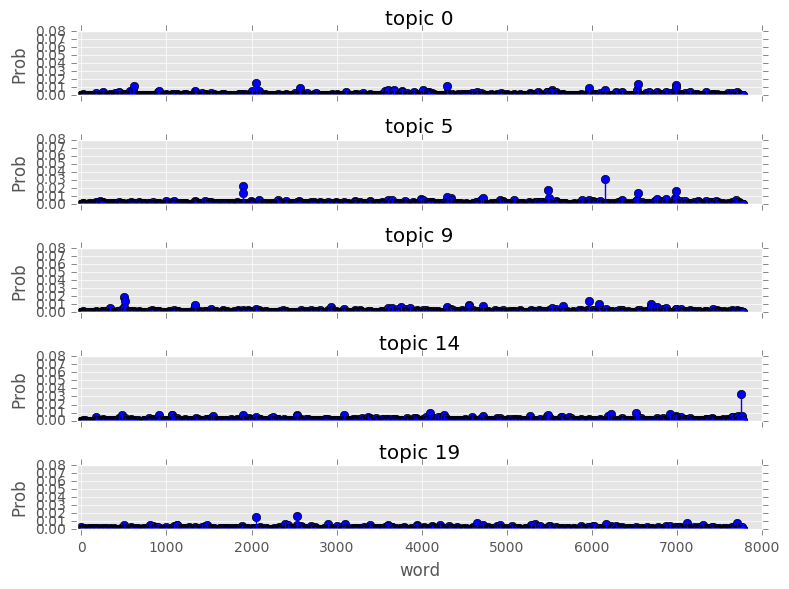

In [65]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([0, 5, 9, 14, 19]):
    ax[i].stem(topic_word[k,:], linefmt='b-',
               markerfmt='bo', basefmt='w-')
    ax[i].set_xlim(-50,8000)
    ax[i].set_ylim(0, 0.08)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("topic {}".format(k))

ax[4].set_xlabel("word")

plt.tight_layout()
plt.show()

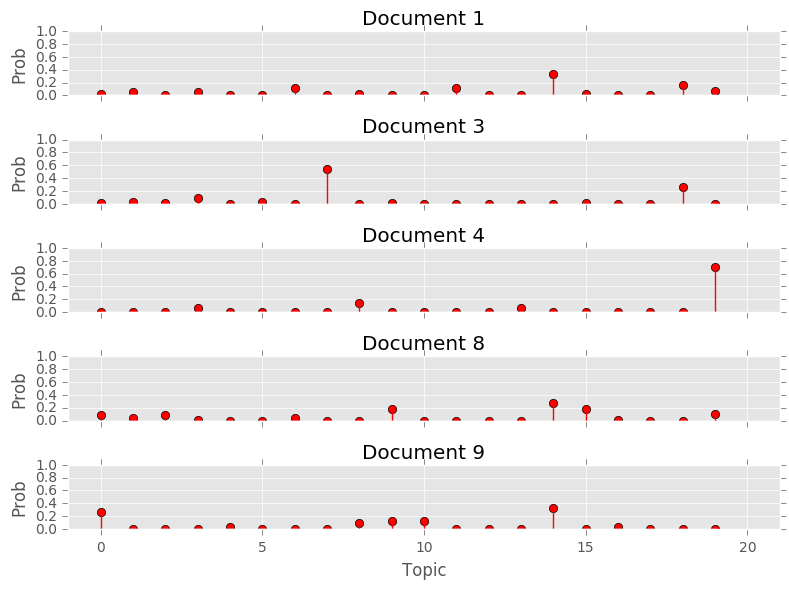

In [66]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 21)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

In [75]:
model5 = lda.LDA(n_topics=5, n_iter=50, random_state=1)
model5.fit(cv)


INFO:lda:n_documents: 26716
INFO:lda:vocab_size: 7772
INFO:lda:n_words: 8885883
INFO:lda:n_topics: 5
INFO:lda:n_iter: 50
INFO:lda:<0> log likelihood: -82975695
INFO:lda:<10> log likelihood: -76699240
INFO:lda:<20> log likelihood: -71952116
INFO:lda:<30> log likelihood: -71394588
INFO:lda:<40> log likelihood: -71149188
INFO:lda:<49> log likelihood: -71000976


In [81]:
topic_word5 = model5.topic_word_
print("type(topic_word5): {}".format(type(topic_word5)))
print("shape: {}".format(topic_word5.shape))
doc_topic5 = model5.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic5)))
print("shape: {}".format(doc_topic5.shape))
n = 10
for i, topic_dist5 in enumerate(topic_word5):
    topic_words5 = np.array(vocab)[np.argsort(topic_dist5)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ', '.join(topic_words5)))

type(topic_word5): <class 'numpy.ndarray'>
shape: (5, 7772)
type(doc_topic): <class 'numpy.ndarray'>
shape: (26716, 5)
*Topic 0
- technical, solutions, design, technology, management, security, requirements, knowledge, systems, support
*Topic 1
- you, software, your, new, design, systems, engineering, science, company, from
*Topic 2
- research, clinical, health, medical, statistical, care, analysis, staff, all, including
*Topic 3
- management, support, all, information, project, required, by, including, job, systems
*Topic 4
- sales, you, product, marketing, analytics, customer, analysis, products, strong, teams


In [84]:
lists = lda.utils.matrix_to_lists(cv)
lists

(array([ 203,  203,  231, ..., 7757, 7757, 7757], dtype=int32),
 array([    0,     0,     0, ..., 26715, 26715, 26715], dtype=int32))

In [78]:
for n in range(10):
    topic_most_pr = doc_topic5[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:80]))

doc: 0 topic: 0
Washington,DC-data+architect-Hill Associates-Senior Telecommunications Network E...
doc: 1 topic: 1
Seattle,WA-data+architect-Wimmer Solutions-Data Architect - 18709...
doc: 2 topic: 0
Chicago,IL-data+architect-ASK Staffing-Service Now Technology Architect...
doc: 3 topic: 0
Chicago,IL-data+architect-Hirewell-Lead Network Architect...
doc: 4 topic: 2
Boston,MA-data+analyst-Ubuntu Autism Consultants-Registered Behavior Technician...
doc: 5 topic: 3
Washington,DC-data+architect-Blackstone Technology Group-Software Delivery Engin...
doc: 6 topic: 4
San+Francisco,CA-data+analyst-Sunrun-Technical Pricing Analyst...
doc: 7 topic: 3
Chicago,IL-data+analyst-Morningstar-Manager Research Analyst...
doc: 8 topic: 4
New+York,NY-data+scientist-Tilting Point-Data Scientist...
doc: 9 topic: 1
Seattle,WA-data+engineer-Seattle Children's Hospital-Data Engineer, Sr...


In [103]:
res =[]

for n in range(len(job_types)):
    topic_most_pr = doc_topic5[n].argmax()
    #print(job_types[n])
    #print("doc: {} topic: {}\n{}...".format(n,
    #                                        topic_most_pr,
    #                                        [n][:80]))
    res.append([job_types[n],topic_most_pr,1])

In [104]:
res

[['data+architect', 0, 1],
 ['data+architect', 1, 1],
 ['data+architect', 0, 1],
 ['data+architect', 0, 1],
 ['data+analyst', 2, 1],
 ['data+architect', 3, 1],
 ['data+analyst', 4, 1],
 ['data+analyst', 3, 1],
 ['data+scientist', 4, 1],
 ['data+engineer', 1, 1],
 ['data+architect', 0, 1],
 ['data+analyst', 3, 1],
 ['data+engineer', 1, 1],
 ['data+engineer', 1, 1],
 ['data+scientist', 2, 1],
 ['data+analyst', 3, 1],
 ['data+engineer', 1, 1],
 ['data+scientist', 2, 1],
 ['data+analyst', 2, 1],
 ['data+analyst', 2, 1],
 ['data+analyst', 0, 1],
 ['data+analyst', 3, 1],
 ['data+scientist', 3, 1],
 ['data+engineer', 3, 1],
 ['data+architect', 3, 1],
 ['data+engineer', 3, 1],
 ['data+scientist', 1, 1],
 ['data+engineer', 3, 1],
 ['data+engineer', 3, 1],
 ['data+analyst', 3, 1],
 ['data+scientist', 1, 1],
 ['data+engineer', 1, 1],
 ['data+architect', 0, 1],
 ['data+engineer', 0, 1],
 ['data+scientist', 1, 1],
 ['data+scientist', 3, 1],
 ['data+engineer', 2, 1],
 ['statistician', 4, 1],
 ['data

In [106]:
df_res = pd.DataFrame(res)
df_res.columns = ('job_type','lda_topic','count')
df_res.head()

,job_type,lda_topic,count
0,data+architect,0,1
1,data+architect,1,1
2,data+architect,0,1
3,data+architect,0,1
4,data+analyst,2,1


In [107]:
pivot = df_res.pivot_table(values='count',columns=('job_type','lda_topic'),aggfunc='sum')

In [108]:
pivot

job_type        lda_topic
data+analyst    0             851
                1             785
                2             495
                3            3363
                4            1466
data+architect  0            2546
                1            1886
                2              59
                3             864
                4             248
data+engineer   0            1197
                1            3954
                2             105
                3            1451
                4             293
data+scientist  0             113
                1            1513
                2            1275
                3             556
                4             723
statistician    0             197
                1             142
                2            1394
                3             155
                4            1085
dtype: int64

In [112]:
f, ax= plt.subplots(5, 1, figsize=(2, 8), sharex=True)
for i in ['data+analyst', 'data+architect', 'data+engineer', 'data+scientist', 'statistician']:
    print(pivot[i])
    plt.hist(pivot[i])

lda_topic
0     851
1     785
2     495
3    3363
4    1466
dtype: int64
lda_topic
0    2546
1    1886
2      59
3     864
4     248
dtype: int64
lda_topic
0    1197
1    3954
2     105
3    1451
4     293
dtype: int64
lda_topic
0     113
1    1513
2    1275
3     556
4     723
dtype: int64
lda_topic
0     197
1     142
2    1394
3     155
4    1085
dtype: int64


In [ ]:
import seaborn as sns
%matplotlib inline

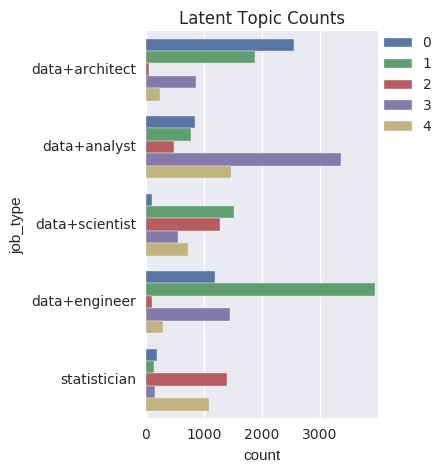

In [154]:
fig, ax = plt.subplots(figsize=( 3,5));
ax = sns.countplot(y="job_type", hue="lda_topic", data=df_res);
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);
ax.set(title='Latent Topic Counts');
ax.set(xticks=np.arange(0,4000,1000));

In [121]:
df_res[df_res['job_type']=='data+analyst']

,job_type,lda_topic,count
4,data+analyst,2,1
6,data+analyst,4,1
7,data+analyst,3,1
11,data+analyst,3,1
15,data+analyst,3,1
18,data+analyst,2,1
19,data+analyst,2,1
20,data+analyst,0,1
21,data+analyst,3,1
29,data+analyst,3,1


In [ ]:
sns.heatmap()